#  Fashion MNIST Autoencoder

## 1.0 Study purpose

* Build and train an autoencoder for the Fashion MNIST dataset.
* Compress the images into a lower-dimensional representation.
* Reconstruct the original images from the compressed representations.
* Monitor the reconstruction loss during training.
* Evaluate performance by visualizing reconstructed images.

## 2.0 Data Understanding

### 2.1 Prelimary data analysis

#### 2.1.1 Import libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
import tensorflow as tf

%matplotlib inline

In [71]:
from matplotlib import pyplot
from keras.datasets import mnist, fashion_mnist, cifar100
from keras.models import Model
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Dense , Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.optimizers import Adam ,RMSprop
from keras import backend as K
from subprocess import check_output

#### 2.1.2 Suppress warnings

In [72]:
warnings.filterwarnings('ignore')

#### 2.1.3 Data ingestion

In [73]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [74]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


#### 2.1.4 Set random seed

In [75]:
np.random.seed(42)

### 2.2 Data quality

#### 2.2.1 Training data sample images

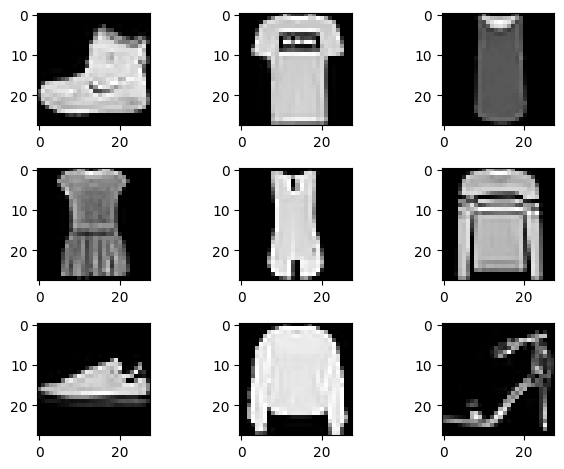

In [76]:
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))

pyplot.tight_layout()
pyplot.show()

#### 2.2.2 Training label data counts

In [77]:
unique, counts = np.unique(train_y, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


#### 2.2.3 Testing label data counts

In [78]:
unique, counts = np.unique(test_y, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {np.uint8(0): np.int64(1000), np.uint8(1): np.int64(1000), np.uint8(2): np.int64(1000), np.uint8(3): np.int64(1000), np.uint8(4): np.int64(1000), np.uint8(5): np.int64(1000), np.uint8(6): np.int64(1000), np.uint8(7): np.int64(1000), np.uint8(8): np.int64(1000), np.uint8(9): np.int64(1000)}


#### 2.2.4 Label descriptions

1.	T-shirt/top
2.	Trouser
3.	Pullover
4.	Dress
5.	Coat
6.	Sandal
7.	Shirt
8.	Sneaker
9.	Bag
10.	Ankle boot

### 2.3 Exploratory data analysis

## 3.0 Data preprocessing

### 3.1 Compute the number of labels

In [79]:
num_labels = len(np.unique(train_y))
num_labels

10

### 3.2 Encode output data

In [80]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

### 3.3 Image dimensions

In [81]:
image_size = train_X.shape[1]
input_size = image_size * image_size
input_size

784

In [82]:
train_X = np.expand_dims(train_X, axis=-1)

### 3.4 Number of classes

In [83]:
num_classes = test_y.shape[1]

### 3.5 Resize and normalize data

#### 3.5.1 Training data

In [84]:
train_X1 = np.reshape(train_X, [-1, input_size])
train_X1 = train_X1.astype('float32') / 255
train_X = train_X.astype('float32') / 255

In [85]:
print('X1_train: ' + str(train_X1.shape))
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))

X1_train: (60000, 784)
X_train: (60000, 28, 28, 1)
Y_train: (60000, 10)


#### 3.5.2 Testing data

In [86]:
test_X1 = np.reshape(test_X, [-1, input_size])
test_X1 = test_X1.astype('float32') / 255
test_X = test_X.astype('float32') / 255

In [87]:
print('X1_test:  '  + str(test_X1.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X1_test:  (10000, 784)
X_test:  (10000, 28, 28)
Y_test:  (10000, 10)


### 4.0 Modeling

### 4.1 Encoder model dimensions

In [88]:
input_dim = train_X1.shape[1]
encoding_dim = 32

### 4.2 Configure the model

#### 4.2.1 Input layer

In [89]:
input_layer = Input(shape=(input_dim,))

#### 4.2.2 Encoder layer

In [90]:
encoded = Dense(encoding_dim, activation='relu')(input_layer)

#### 4.2.3 Decoder layer

In [91]:
decoded = Dense(input_dim, activation='sigmoid')(encoded)

### 4.3 Autoencoder model

In [92]:
autoencoder = Model(input_layer, decoded)

In [93]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

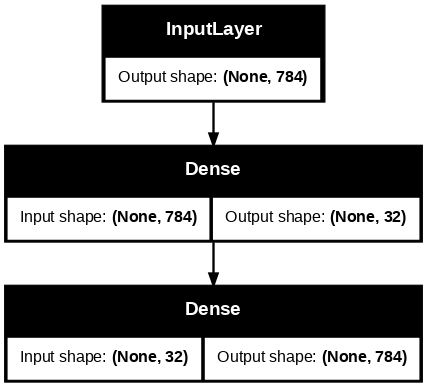

In [94]:
plot_model(autoencoder, to_file='mlp-fashion-mnist-encode.png', show_shapes=True, dpi=84)

### 4.4 Compile the model

In [95]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### 4.4 Fit the autoencoder

In [96]:
autoencoder.fit(train_X1, train_X1,
  epochs=20,
  batch_size=256,
  shuffle=True,
  validation_data=(test_X1, test_X1),
  verbose=1)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.4999 - val_loss: 0.3403
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3306 - val_loss: 0.3174
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3124 - val_loss: 0.3059
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3020 - val_loss: 0.2987
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2959 - val_loss: 0.2943
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2914 - val_loss: 0.2918
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2888 - val_loss: 0.2899
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2874 - val_loss: 0.2886
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2863 - val_loss: 0.2878
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2856 - val_loss: 0.2873
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2854 - val_loss: 0.2869
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

## 5.0 Evaluation

In [97]:
encoded_images = autoencoder.predict(test_X1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [98]:
def plot_mnist_images(original, decoded, n=10):
  plt.figure(figsize=(20, 6))
  for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(original[i].reshape(28, 28), cmap='gray')
    plt.title("Original: {}".format(i))
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded[i].reshape(28, 28), cmap='gray')
    plt.title("Decoded: {}".format(i))
    plt.axis('off')
  plt.show()

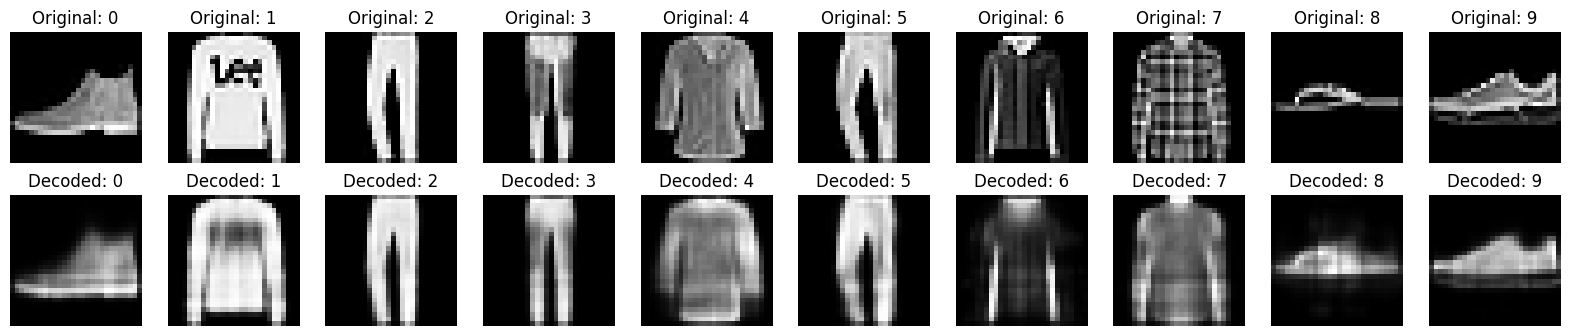

In [99]:
plot_mnist_images(test_X1, encoded_images)

## 6.0 Deployment